In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np


# read in the data
df = pd.read_csv('hackathon_data_2.csv')
df.head().T

,0,1,2,3,4
Müşteri Numarası,301002470,301002470,301002470,301002470,301002470
Firma Adı,Kzar kü pazar,Kzar kü pazar,Kzar kü pazar,Kzar kü pazar,Kzar kü pazar
İşyeri Tipi,Tüzel Şirket,Tüzel Şirket,Tüzel Şirket,Tüzel Şirket,Tüzel Şirket
UyeDurum,Aktif,Aktif,Aktif,Aktif,Aktif
İşyeri Adresi,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN
Sehir,Samsun,Samsun,Samsun,Samsun,Samsun
İşyeri Aktivasyon Tarihi,2015-09-08 15:08:23,2015-09-08 15:08:23,2015-09-08 15:08:23,2015-09-08 15:08:23,2015-09-08 15:08:23
İşlem Numarası,401003136,403526702,403529006,403530803,403531107
İşlem Tarihi,2015-09-18 14:35:04,2019-04-13 13:31:00,2019-04-13 19:30:00,2019-04-14 13:52:00,2019-04-14 15:09:00
İşlem Tutarı,5.0,32.7,998.05,105.75,163.0


# Hedef Değişken Analizi

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def find_categorics(df, cardinality=20):
    ''''Find_categorics' işlevi girdi olarak bir DataFrame alır ve veri türlerine ve önem derecesine göre
    kategorik sütunların bir listesini döndürür.
    
    Parameters
    ----------
    df
        Kategorik sütunları bulmak istediğiniz giriş veri çerçevesi.
    cardinality, optional
        "Önemlilik" parametresi, bir sütunun kategorik sütun olarak kabul edilmesi için izin verilen
    maksimum benzersiz değer sayısını belirtmek için kullanılır. Belirtilen önem düzeyinden daha büyük
    sayıda benzersiz değere sahip tüm sütunlar, kategorik sütunlar listesinden hariç tutulacaktır.
    
    Returns
    -------
        belirli bir veri çerçevesindeki kategorik sütunların listesi.
    
    '''
    str_cat_cols = [col for col in df.columns if str(df[col].dtype) in ['object', 'category']]
    num_cat_cols = [col for col in df.columns if str(df[col].dtype) in ['int64', 'float64'] and df[col].nunique() < cardinality]
    bool_cat_cols = [col for col in df.columns if str(df[col].dtype) in ['bool']]
    high_cardinality_cols = [col for col in df.columns if str(df[col].dtype) in ['object', 'category'] and df[col].nunique() > cardinality]

    categorical_columns = str_cat_cols + num_cat_cols + bool_cat_cols
    categorical_columns = [col for col in categorical_columns if col not in high_cardinality_cols]

    return categorical_columns


def categoric_summary(df, col_name, plot=False, rotation_degree=0, figure_width=10, figure_height=6):
    '''"categoric_summary" işlevi, çizim için bir DataFrame, bir sütun adı ve isteğe bağlı parametreler
    alır ve benzersiz değerlerin sayısı, eksik değerlerin sayısı, eksik değerlerin yüzdesi ve veri türü
    dahil olmak üzere kategorik sütunun bir özetini döndürür .
    
    Parameters
    ----------
    df
        Analiz etmek istediğiniz veri çerçevesi.
    col_name
        DataFrame'de özetlemek ve çizmek istediğiniz sütunun adı (eğer çizim=True ise).
    plot, optional
        Sütun değerlerinin sayım grafiğinin çizilip çizilmeyeceğini belirleyen bir boole parametresi.
    Varsayılan Yanlış'tır.
    rotation_degree, optional
        rotasyon_degree parametresi, sayım grafiğindeki x ekseni onay etiketlerinin dönüş açısını (derece
    cinsinden) belirtmek için kullanılır. Varsayılan olarak 0'a ayarlıdır; bu, onay etiketlerinin yatay
    olacağı anlamına gelir. Onay etiketlerini tercihinize göre döndürmek için bu değeri
    değiştirebilirsiniz.
    figure_width, optional
        "figure_width" parametresi çizim şeklinin genişliğini inç cinsinden belirtmek için kullanılır.
    figure_height, optional
        "figure_height" parametresi çizim rakamının yüksekliğini inç cinsinden belirtmek için kullanılır.
    
    Returns
    -------
        DataFrame girişinde belirtilen sütun hakkında aşağıdaki bilgileri içeren bir pandas DataFrame:
    
    '''
    temp = pd.DataFrame({"Column Name": [col_name],
                         "N Unique": [df[col_name].nunique()],
                         "NaN": [df[col_name].isnull().sum()],
                         "NaN (%)": [df[col_name].isnull().sum() / df.shape[0]],
                         "Data Type": [df[col_name].dtypes]})


    if plot:
        plt.figure(figsize=(figure_width, figure_height))
        # Tam üst ortada Toplamda kaç kayıt var dfte onu yazdır.
        plt.text(0.5, 1.0, f'Total Records: {df.shape[0]}', horizontalalignment='center', va='top', transform=plt.gca().transAxes, fontdict=dict(color='red', size=12))
        sns.countplot(x=col_name, data=df, order=df[col_name].value_counts().index, palette='inferno')
        plt.title(f"Count Plot of {col_name}")
        plt.xlabel(col_name)
        plt.ylabel("Count")
        plt.xticks(rotation=rotation_degree, ha="right")
        for index, value in enumerate(df[col_name].value_counts()):
            plt.text(index, value, str(value), ha='center', va='bottom')

        plt.show()

    return temp.reset_index(drop=True)

def find_numerics(df):
    '''"Find_numerics" işlevi, kategorik sayısal sütunlar hariç, belirli bir veri çerçevesinden orijinal
    sayısal sütunların bir listesini döndürür.
    
    Parameters
    ----------
    df
        "df" parametresi bir pandanın DataFrame nesnesidir.
    
    Returns
    -------
        belirli bir veri çerçevesindeki orijinal sayısal sütunların listesi.
    
    '''
    numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
    categorical_num_cols = [col for col in df.columns if df[col].nunique() <= 10 and df[col].dtype in ['int64', 'float64']]
    original_numeric_cols = [col for col in numerical_cols if col not in categorical_num_cols]

    return original_numeric_cols


def numeric_summary(df, col_name, plot=False):
    ''''Numeric_summary' işlevi, bir veri çerçevesindeki belirli bir sütun için tanımlayıcı istatistikleri
    hesaplar ve isteğe bağlı olarak sütun değerlerinin bir histogramını çizer.
    
    Parameters
    ----------
    df
        "Df" parametresi, analiz etmek istediğiniz verileri içeren bir pandas DataFrame'dir.
    col_name
        'col_name' parametresi, DataFrame 'df'de kendisi için sayısal özet oluşturmak istediğiniz sütunun
    adıdır.
    plot, optional
        'Plot' parametresi, verilerin histogram grafiğinin görüntülenip görüntülenmeyeceğini belirleyen bir
    boole değeridir. 'Grafik', 'Doğru' olarak ayarlanırsa, işlev bir histogram grafiği oluşturacaktır.
    'Grafik', 'Yanlış' olarak ayarlanırsa, işlev bir çizim oluşturmaz.
    
    Returns
    -------
        veri çerçevesindeki belirtilen sütunun tanımlayıcı istatistikleri. 'Plot' parametresi 'True' olarak
    ayarlanmışsa, aynı zamanda sütun değerlerinin histogramını da görüntüler.
    
    '''
    describe = df[col_name].describe().T

    if plot:
        plt.figure(figsize=(8, 6))
        plt.hist(df[col_name], edgecolor='black', alpha=0.7)
        plt.axvline(df[col_name].mean(), color='navy', linestyle='--', linewidth=2, label='Mean')
        plt.title(f'Distribution of {col_name.capitalize()}')
        # tablo üzerine mean değerini yaz.
        plt.text(df[col_name].mean(), 0.5, f'{round(df[col_name].mean(), 2)}', rotation=45, color='navy')
        plt.xlabel(col_name)
        plt.ylabel('Count')
        plt.legend()
        plt.show()

    return describe


In [10]:
def cluster_analysis(df, cluster_rank):
    ''''
    cluster_analysis' işlevi girdi olarak bir veri çerçevesi ve bir nesne adı alır ve ardından söz konusu
    belirli nesne için veri çerçevesinin kategorik sütunları üzerinde analiz gerçekleştirir.
    
    Parameters
    ----------
    df
        "Df" parametresi, analiz etmek istediğiniz verileri içeren bir pandas DataFrame'dir.
    cluster_rank
        "cluster_rank" parametresi analiz etmek istediğiniz kümenin veya grubun adıdır. Veri çerçevesini
    filtrelemek ve yalnızca söz konusu kümeye ait satırları dikkate almak için kullanılır.
    
    '''
    df = df[df['cluster'] == cluster_rank]
    cat_cols = find_categorics(df)
    num_cols = find_numerics(df)

    for col in cat_cols:
        categoric_summary(df, col, rotation_degree=45,plot=True)

    for col in num_cols:
        numeric_summary(df, col, plot=True)

def normal_analysis(df):
    ''''
    normal_analysis' işlevi girdi olarak bir veri çerçevesi ve bir nesne adı alır ve ardından söz konusu
    belirli nesne için veri çerçevesinin kategorik sütunları üzerinde analiz gerçekleştirir.
    
    Parameters
    ----------
    df
        "Df" parametresi, analiz etmek istediğiniz verileri içeren bir pandas DataFrame'dir.
    cluster_rank
        "cluster_rank" parametresi analiz etmek istediğiniz kümenin veya grubun adıdır. Veri çerçevesini
    filtrelemek ve yalnızca söz konusu kümeye ait satırları dikkate almak için kullanılır.
    
    '''
    cat_cols = find_categorics(df)
    num_cols = find_numerics(df)

    cat_cols = ["İşyeri Tipi","Sehir","İşlem Türü",
                "Mevsim","Tatil","Bölge","Müşteri İşlem Kategorisi"]

    for col in cat_cols:
        categoric_summary(df, col, rotation_degree=45,plot=True)

    for col in num_cols:
        numeric_summary(df, col, plot=True)

In [11]:
cats = find_categorics(df,15)
nums = find_numerics(df)

obek_means = {}

for obek in df['cluster'].sort_values(ascending=True).unique():
    mean_data = df[df['cluster']==obek].describe().T['mean']
    obek_means[obek] = mean_data

obek_df = pd.DataFrame(obek_means)
obek_df['Genel Ortalama'] = df[nums].describe().T['mean']

In [12]:
np.round(obek_df)

,0,1,2,3,Genel Ortalama
Müşteri Numarası,301023128.0,301023012.0,301023046.0,301023942.0,301023288.0
İşlem Numarası,460913146.0,451100252.0,440403884.0,452195426.0,452222912.0
İşlem Tutarı,166.0,150.0,121.0,129.0,144.0
cluster,0.0,1.0,2.0,3.0,NaN
Sistem Yaşı,5.0,5.0,5.0,5.0,NaN


### Çıkarımlar 🤔
cluster 0: 

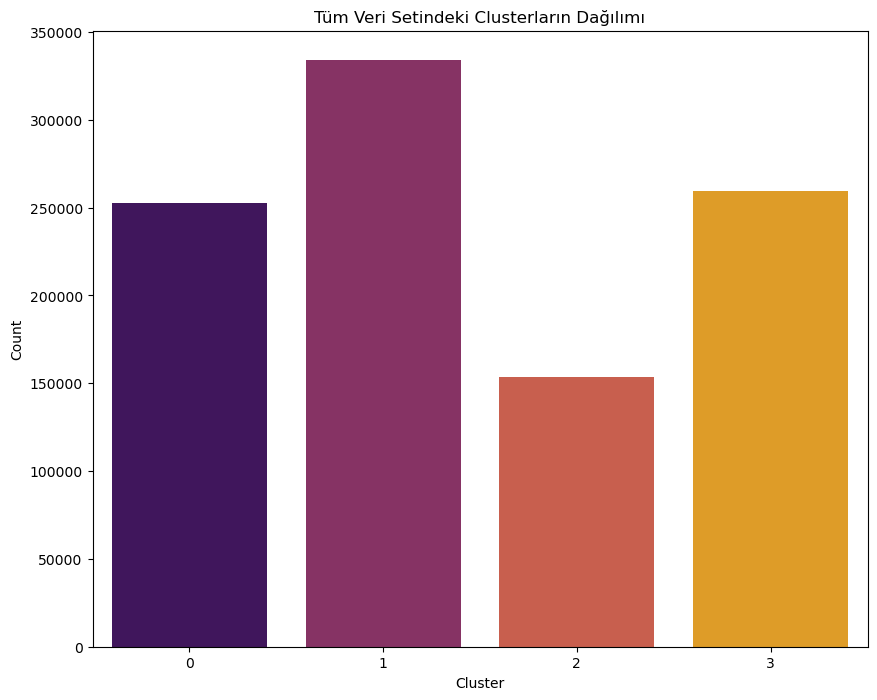

In [13]:
# Tüm veri setindeki clusterların dağılımı.
plt.figure(figsize=(10,8))
sns.countplot(x='cluster', data=df, palette='inferno')
plt.title('Tüm Veri Setindeki Clusterların Dağılımı')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


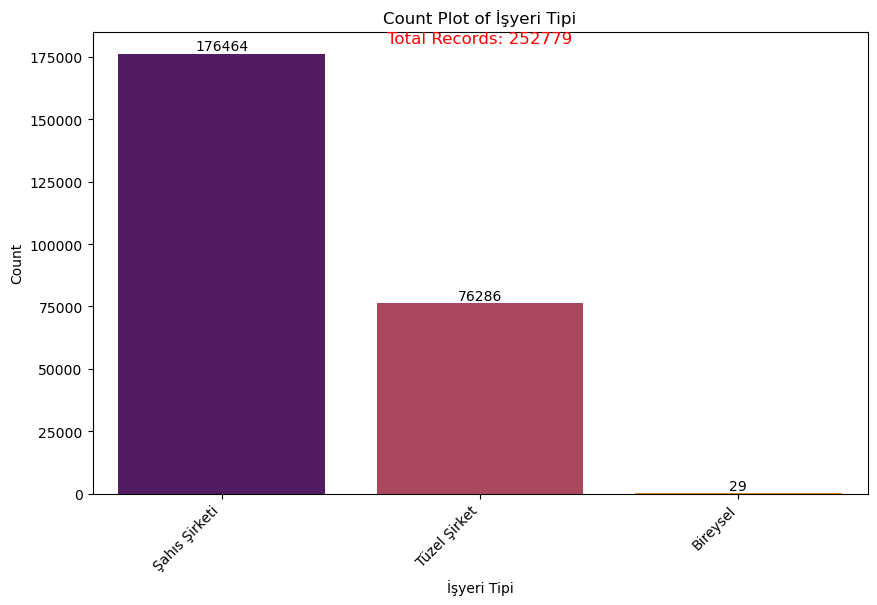

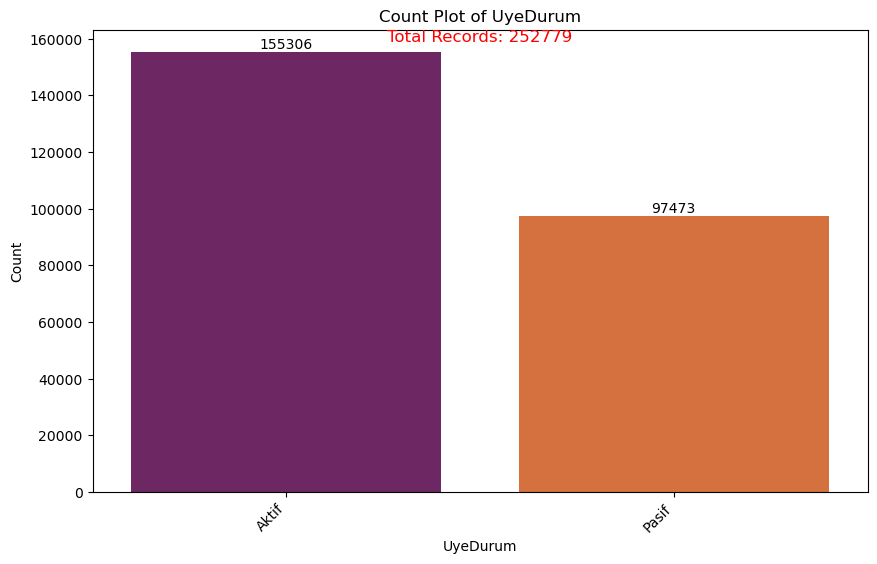

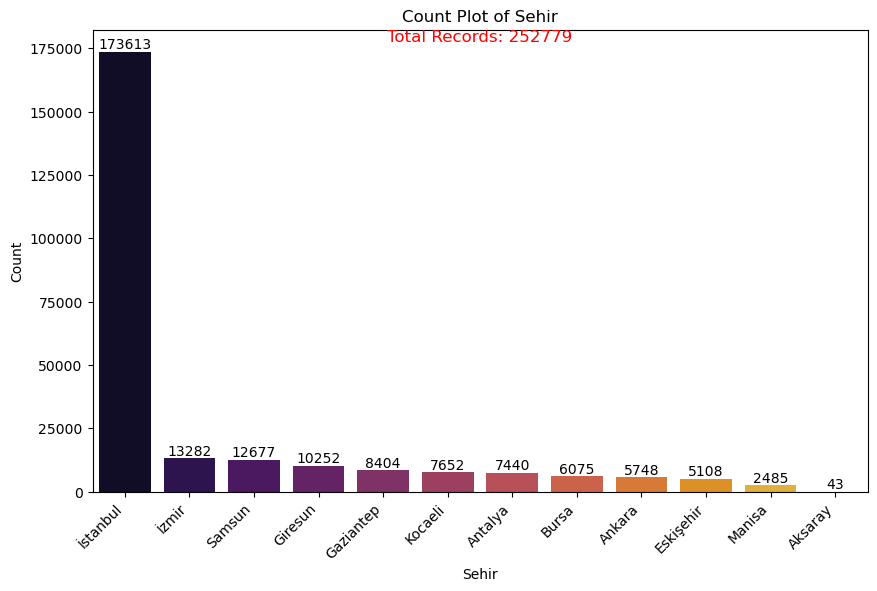

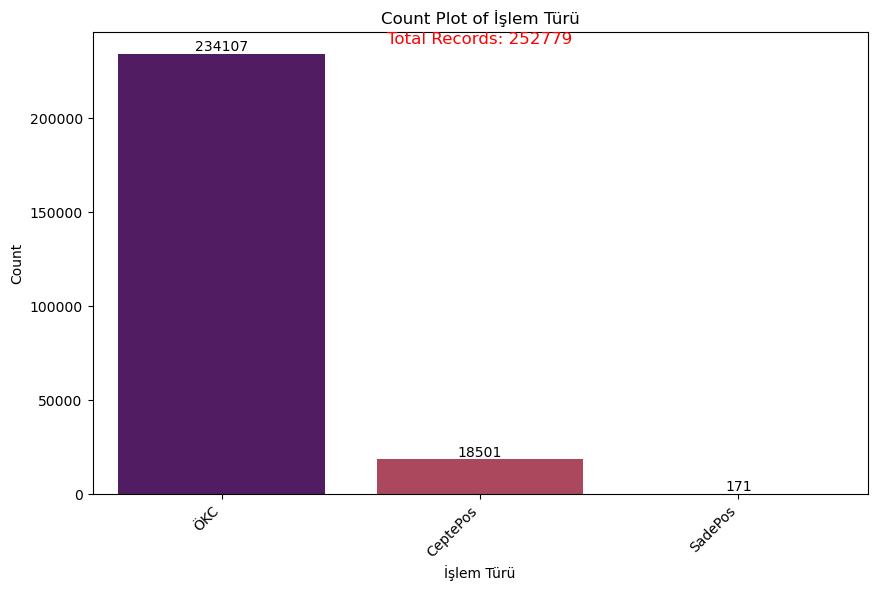

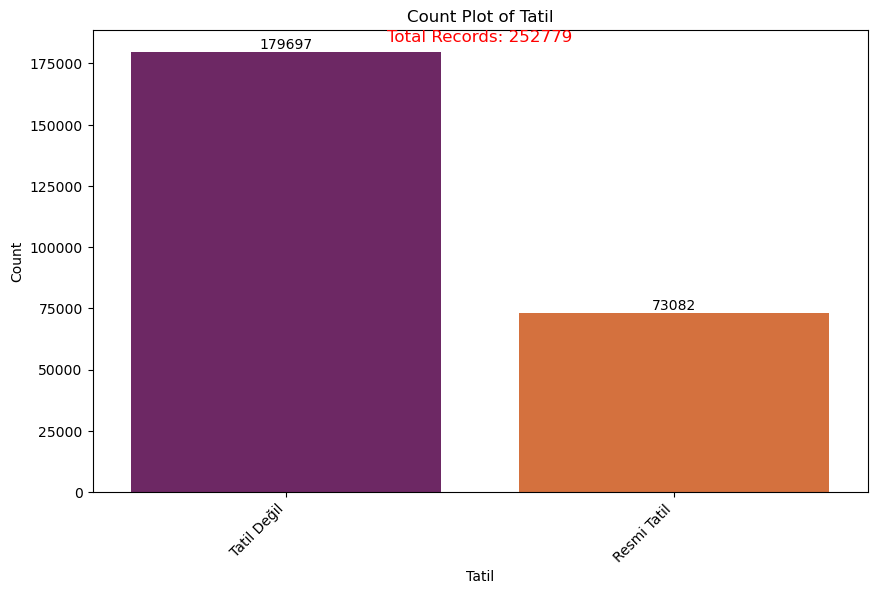

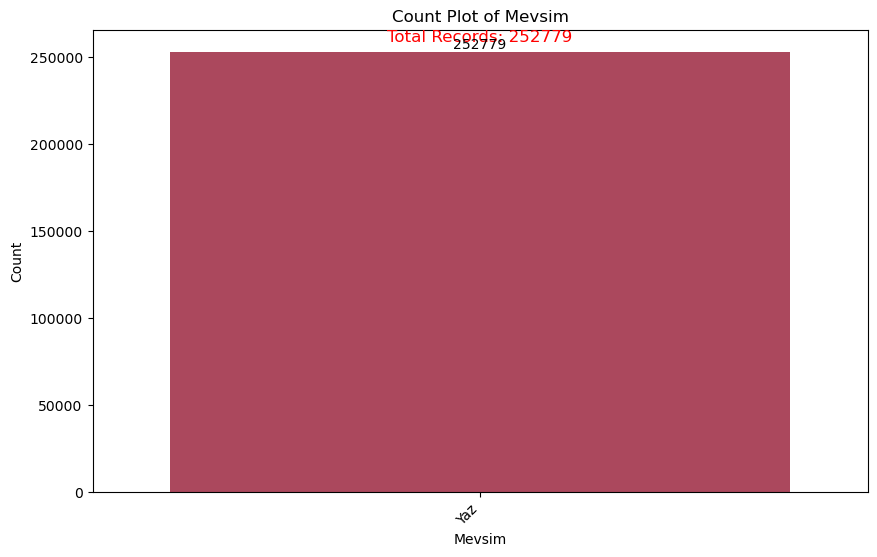

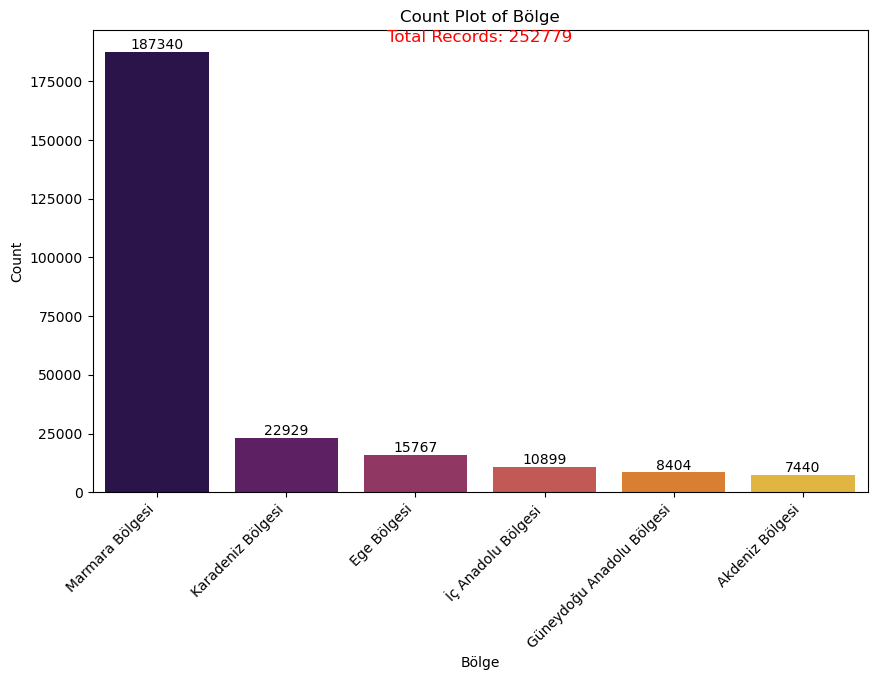

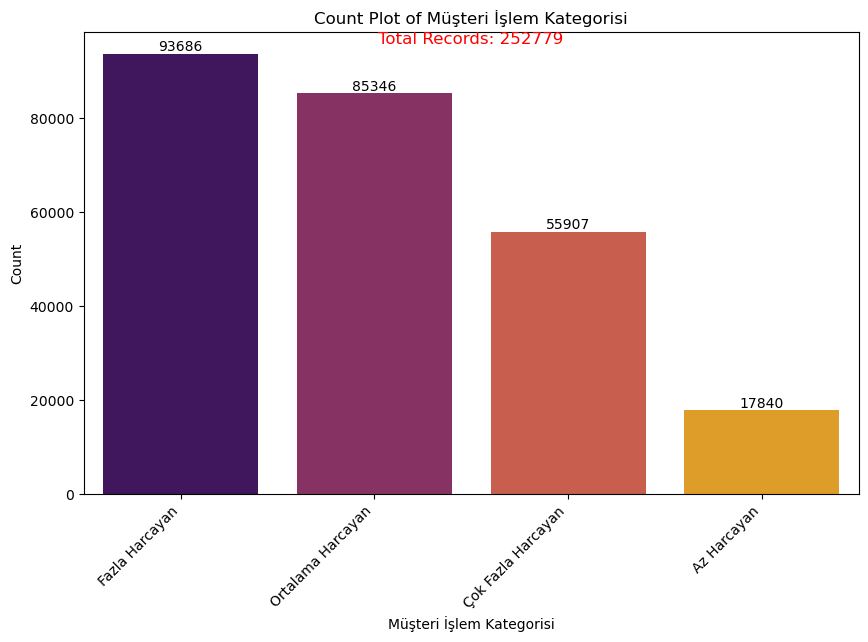

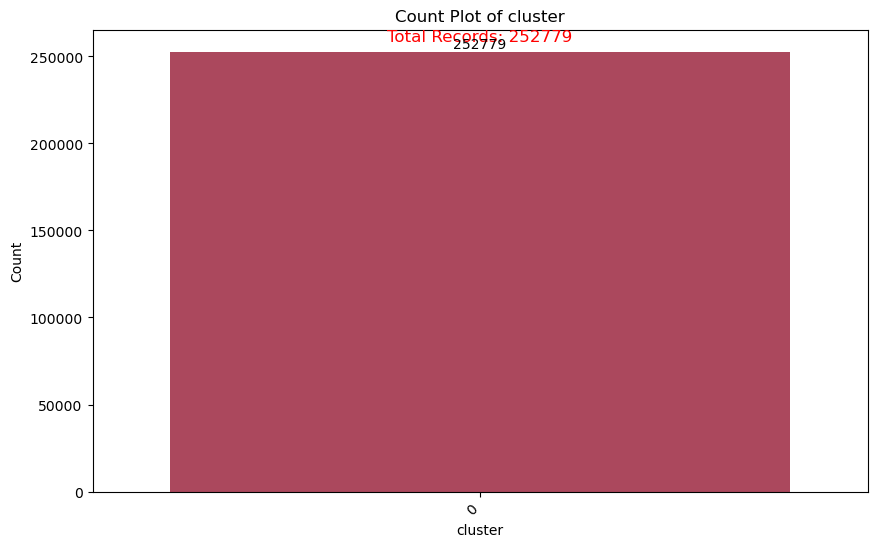

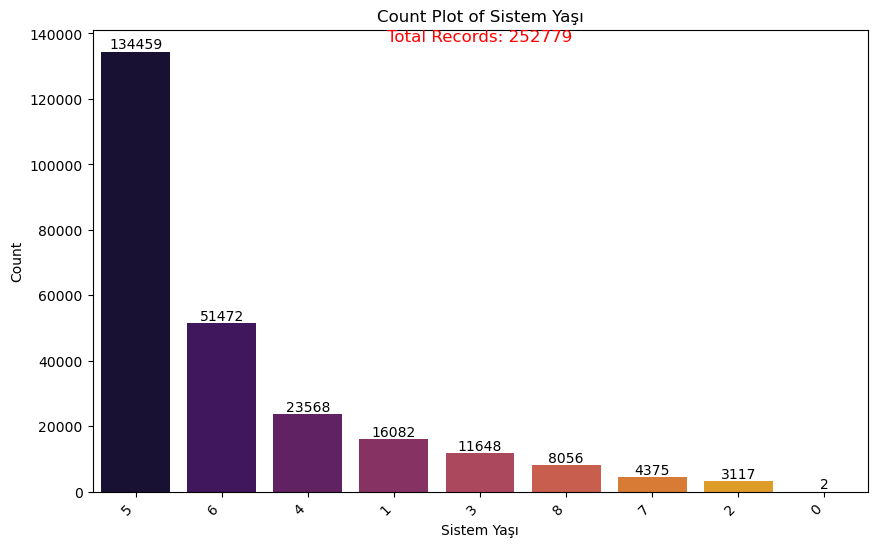

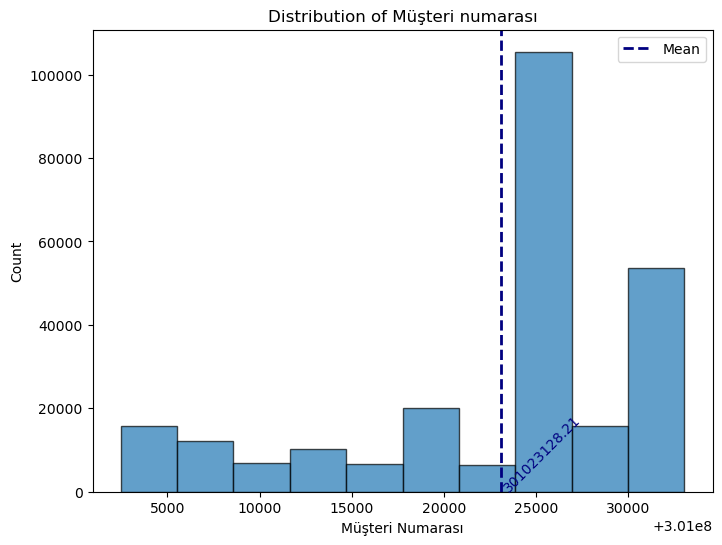

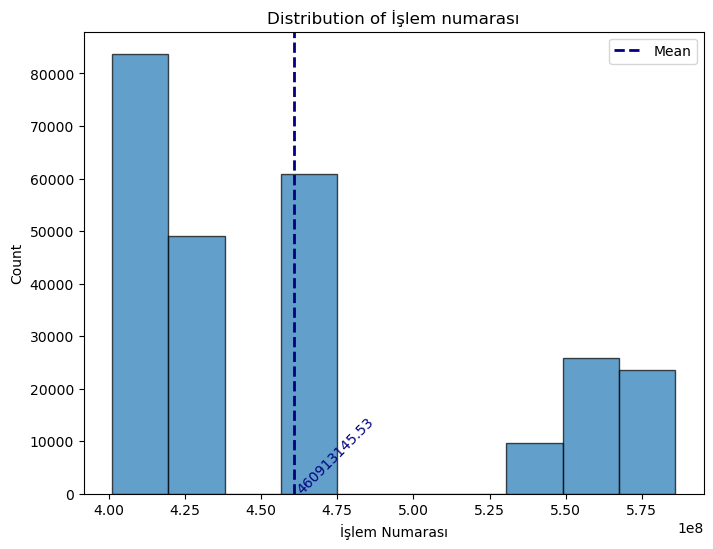

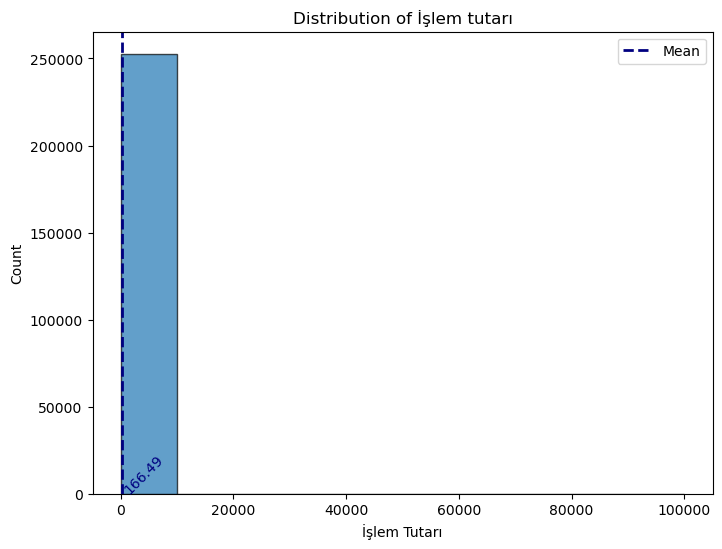

In [14]:
# cluster 0 olarak işaretlenmesinin sebebi ne olabilir?
cluster_analysis(df,0)

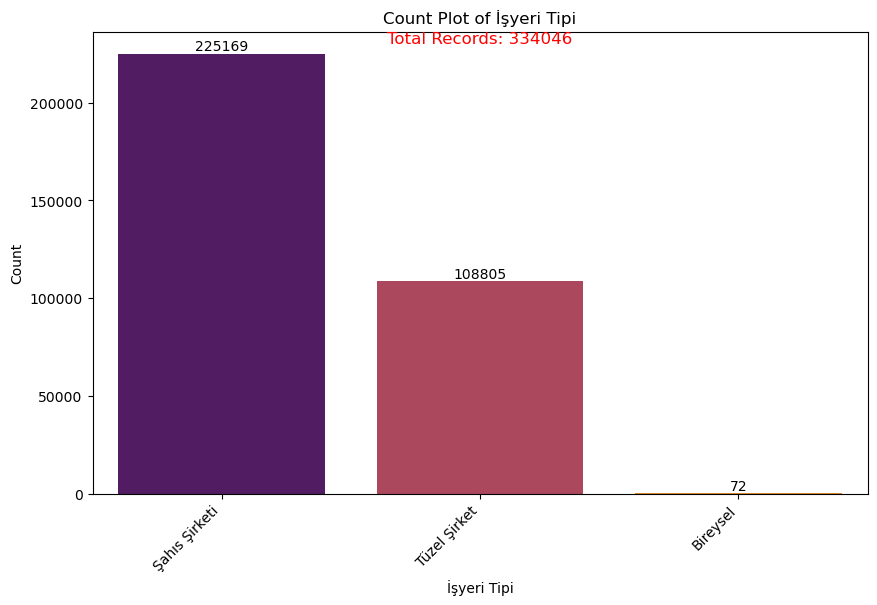

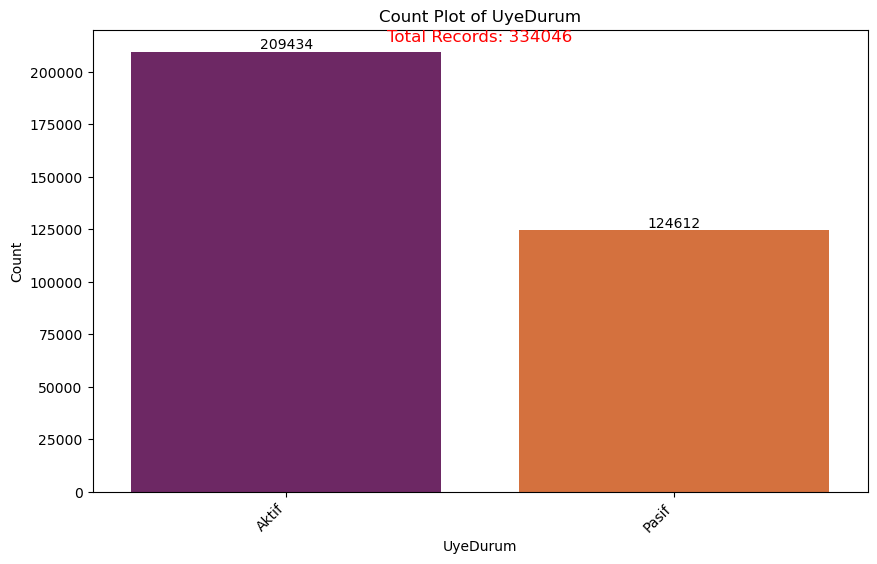

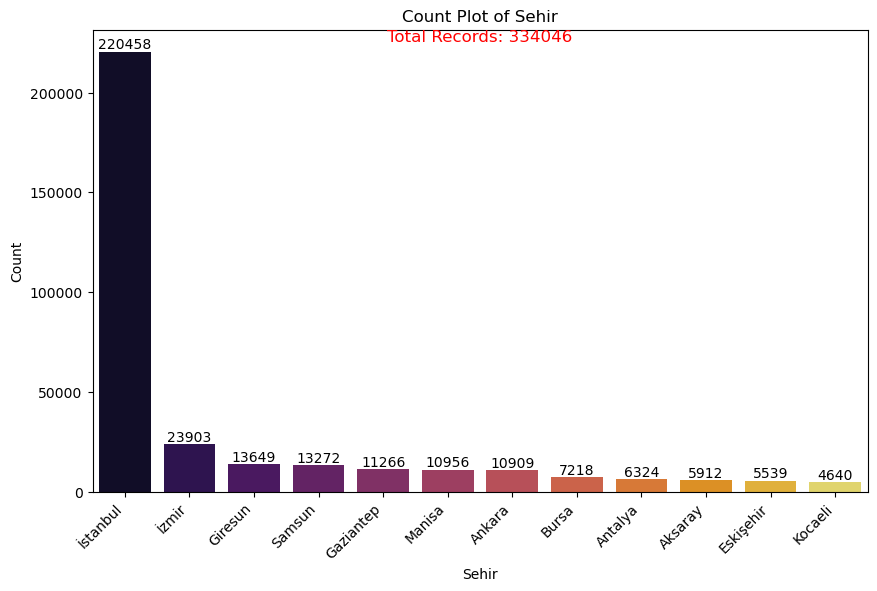

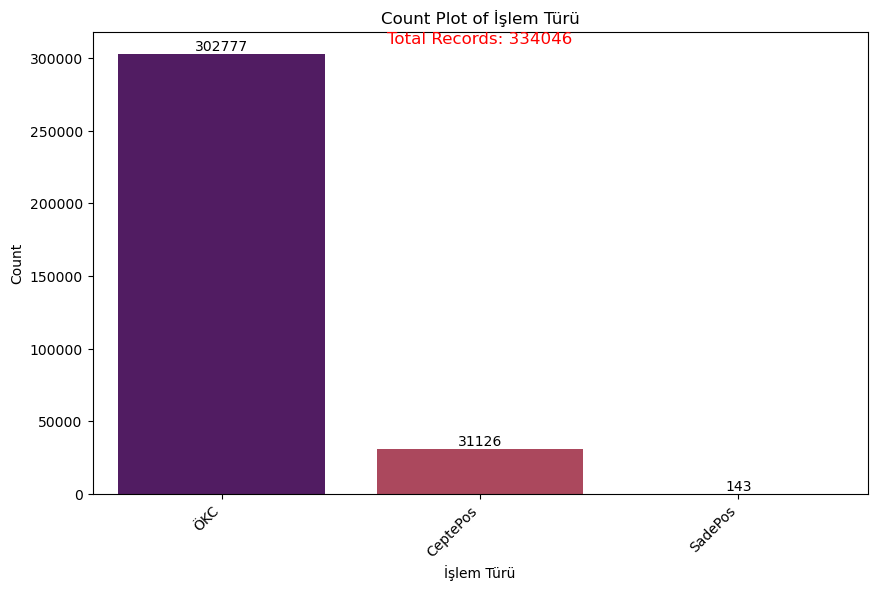

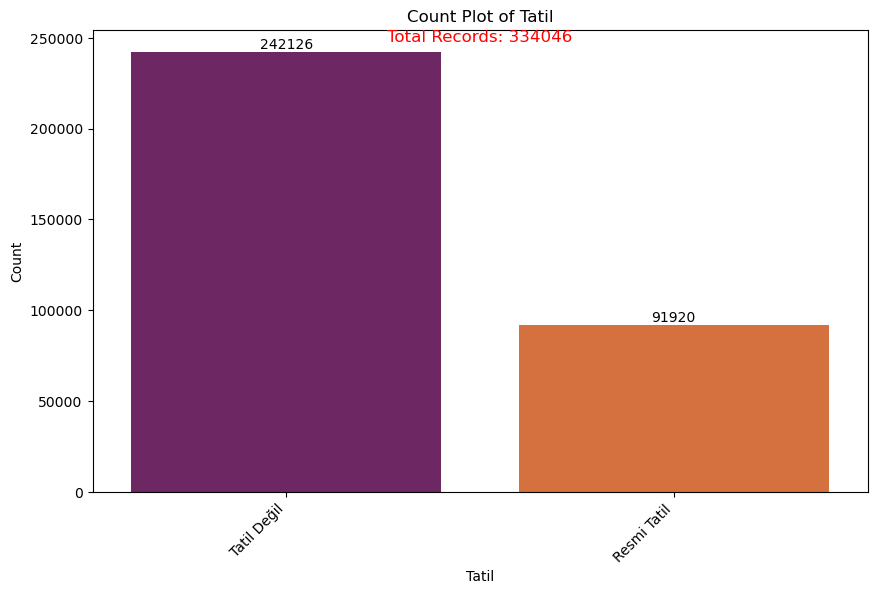

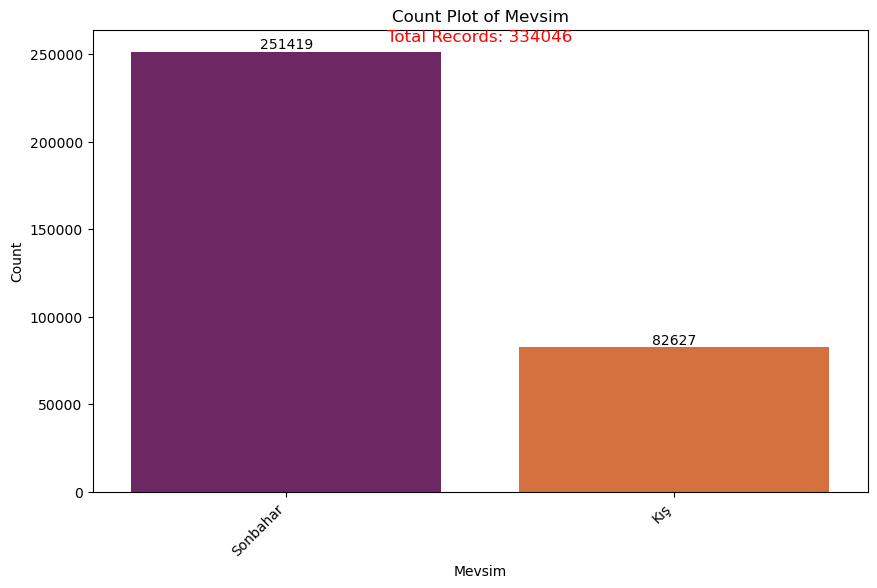

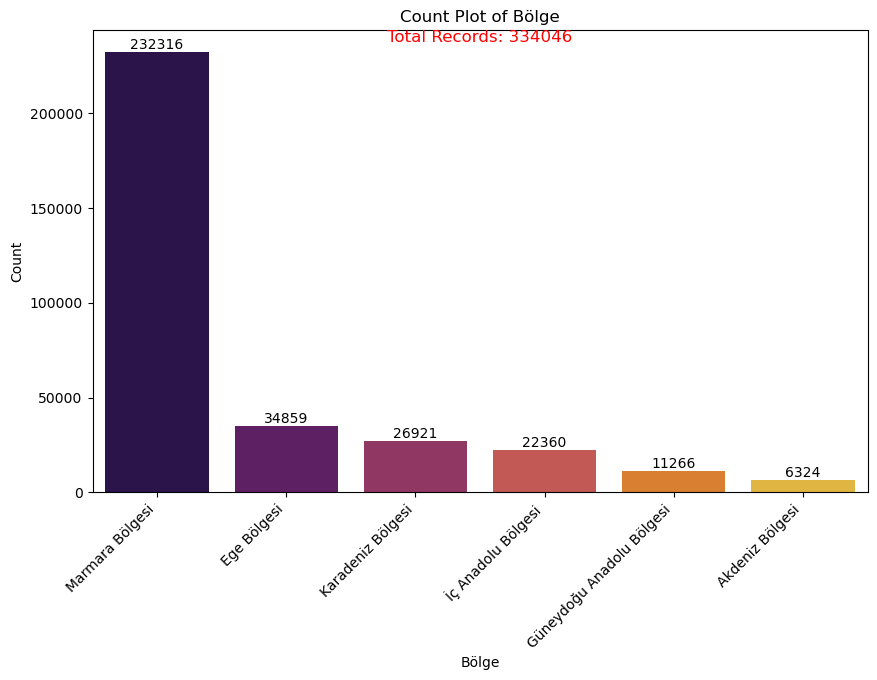

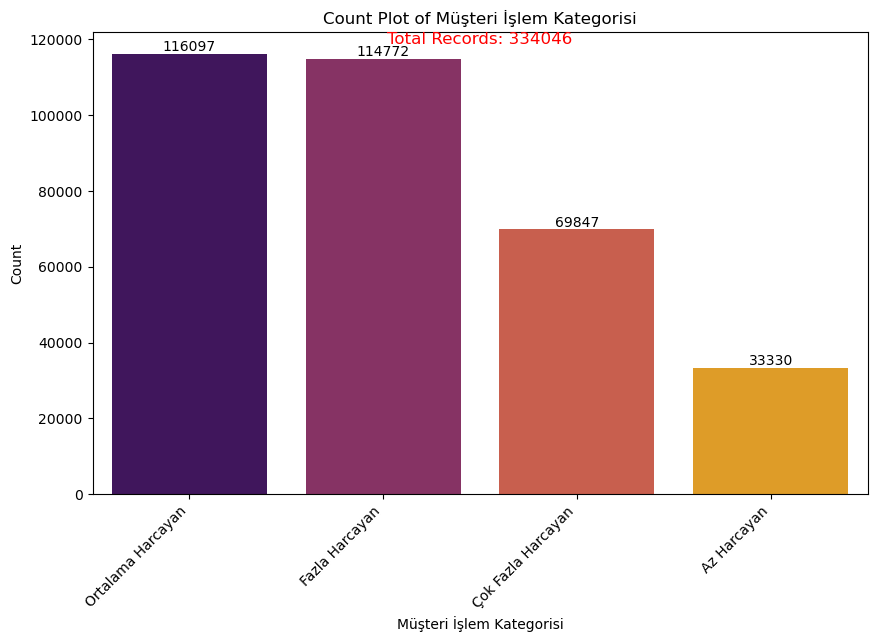

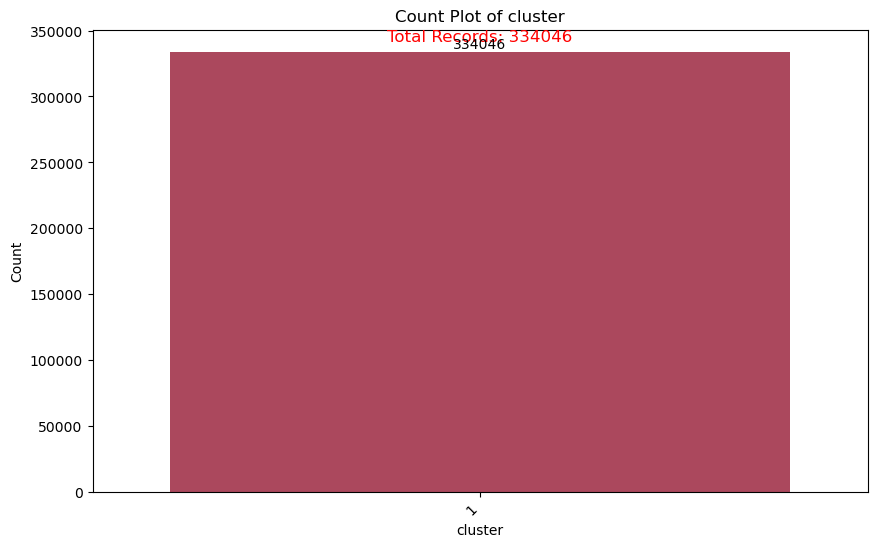

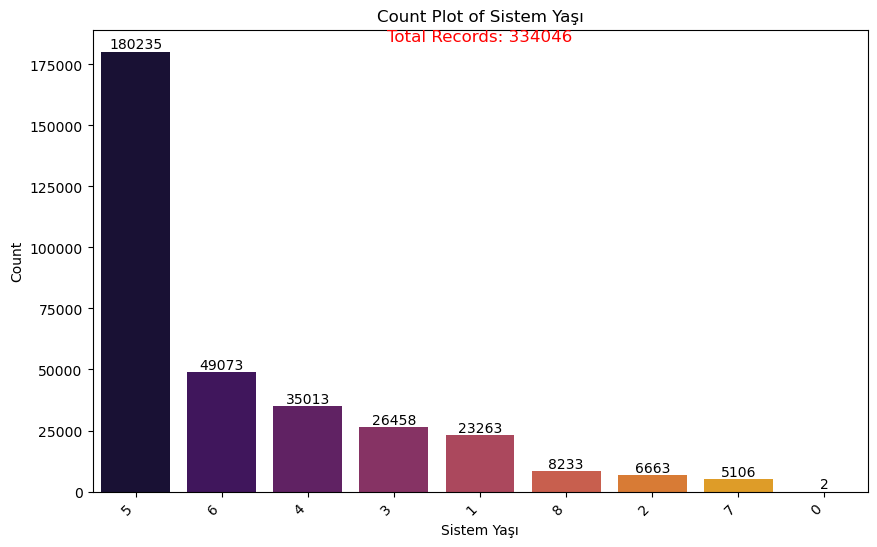

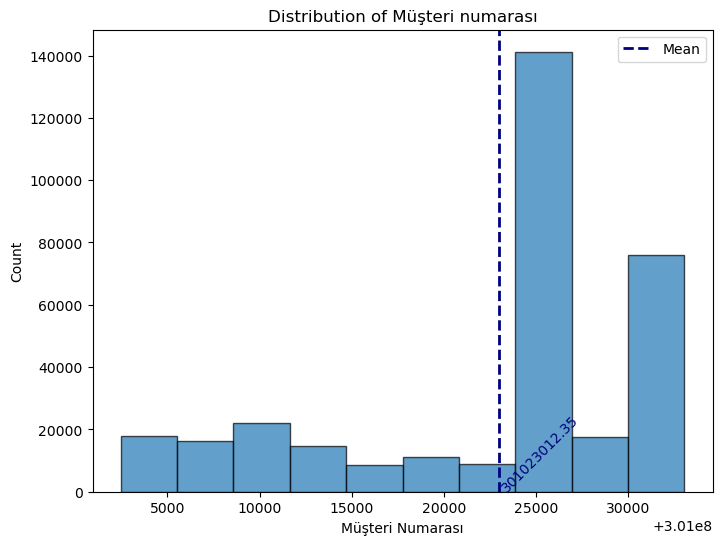

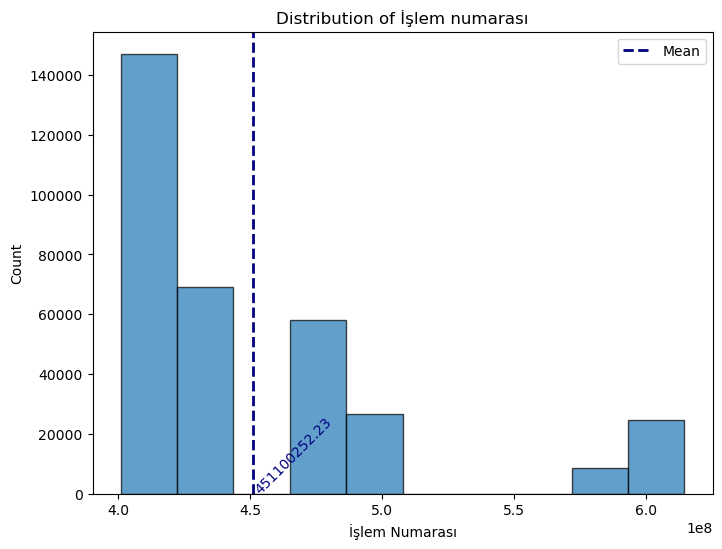

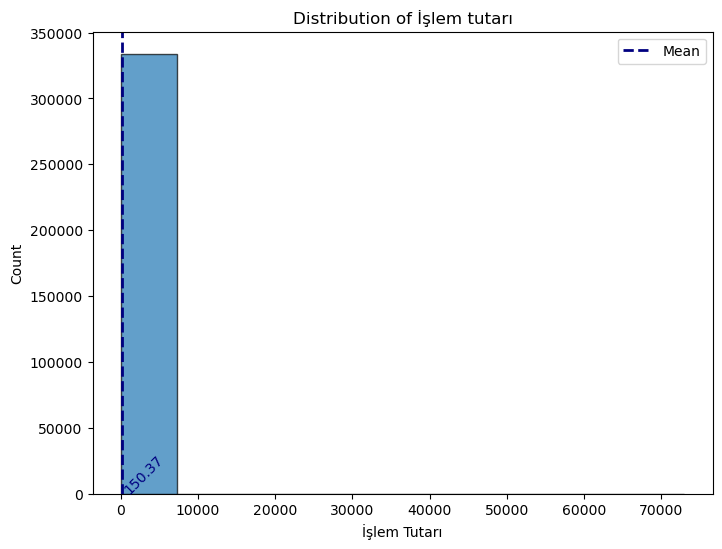

In [15]:
cluster_analysis(df,1)

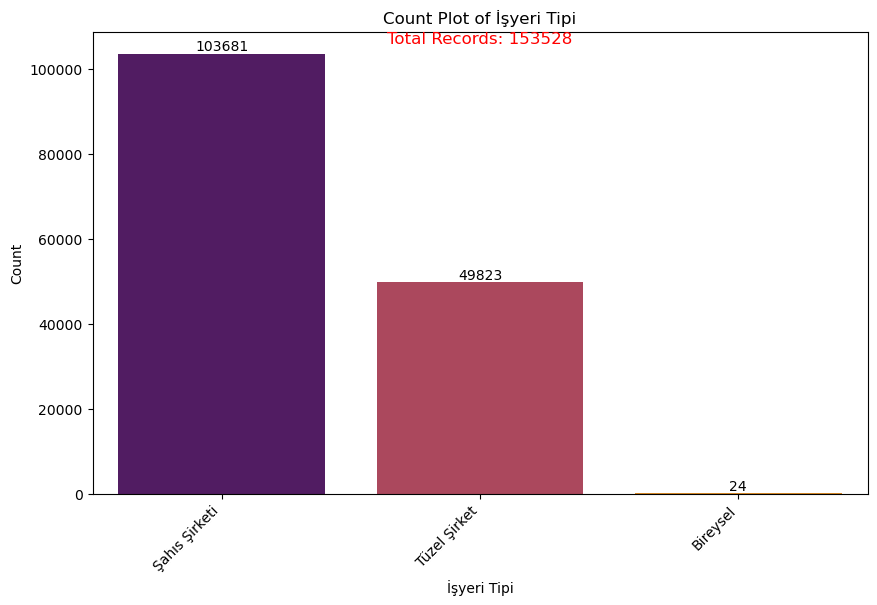

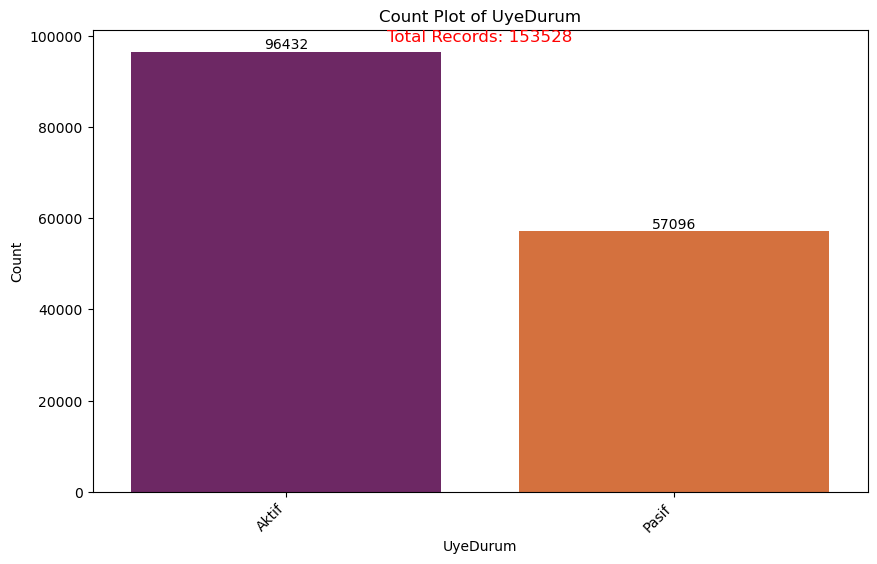

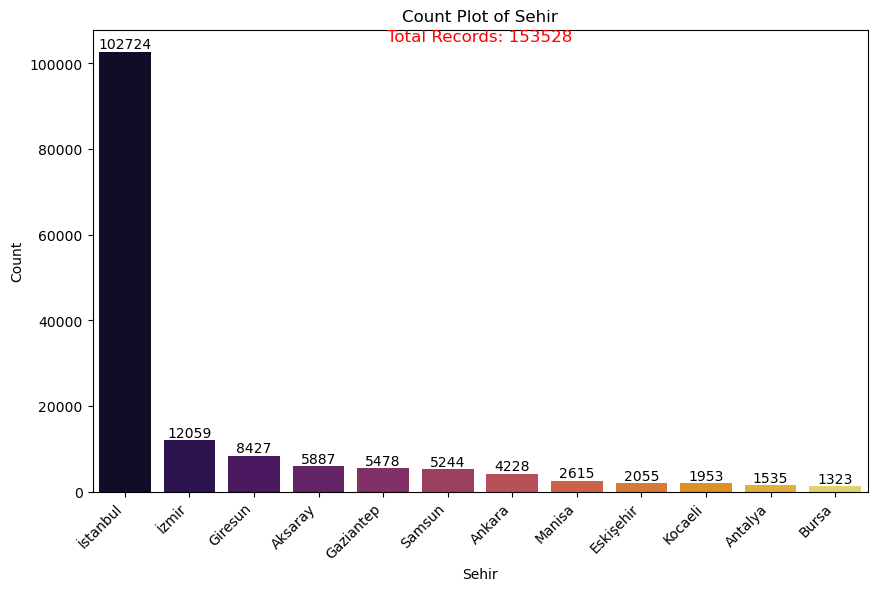

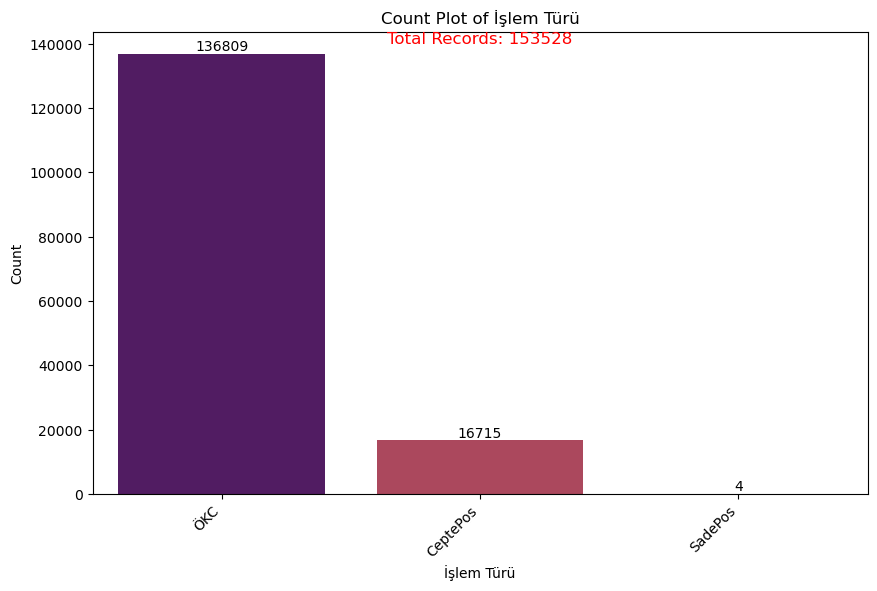

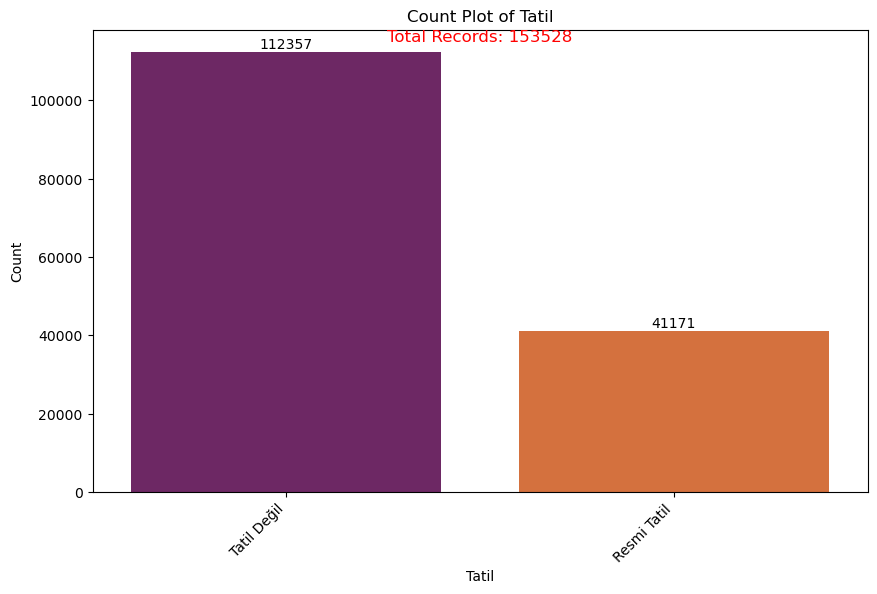

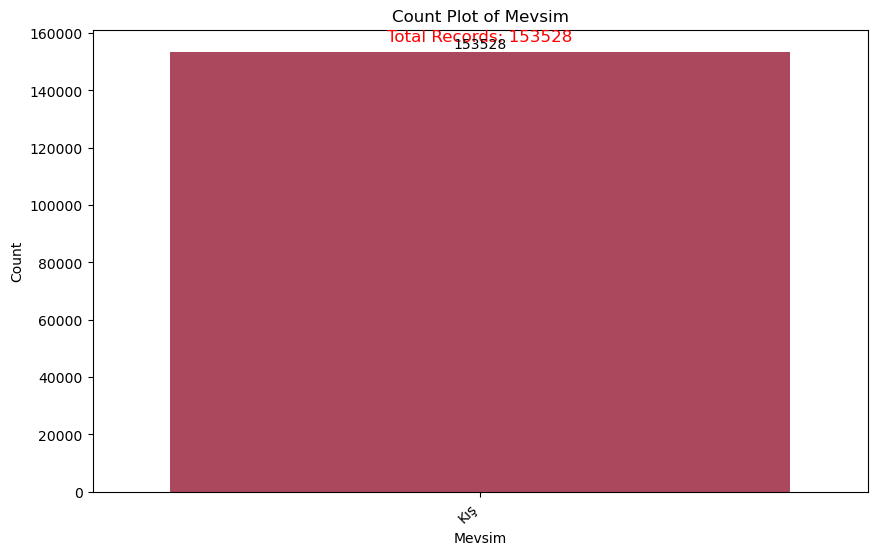

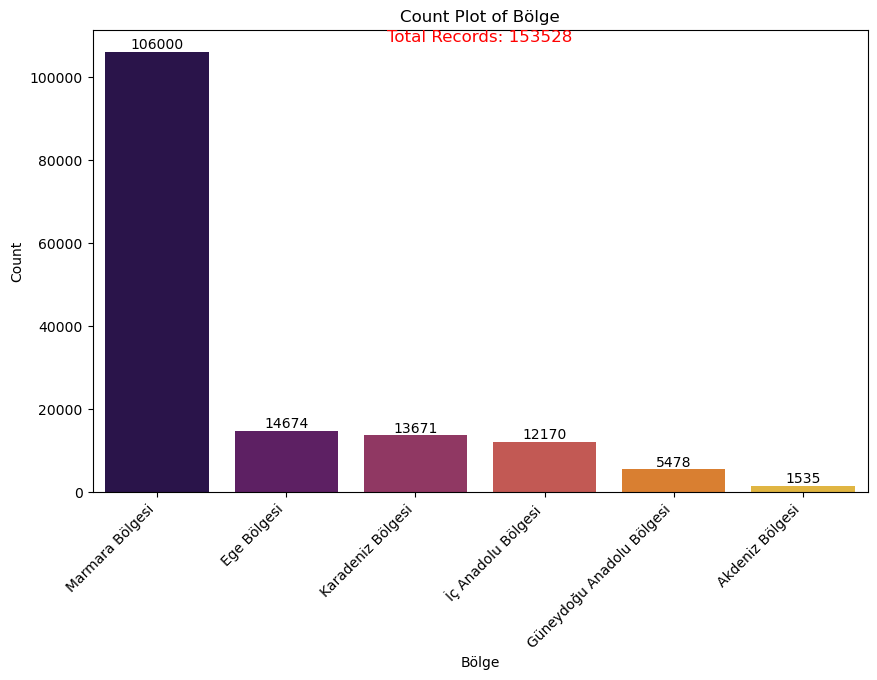

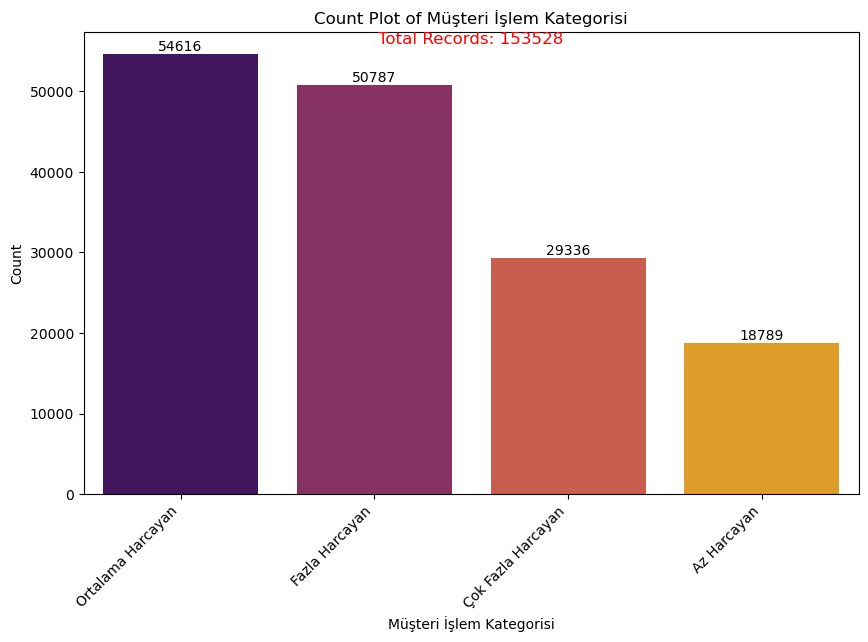

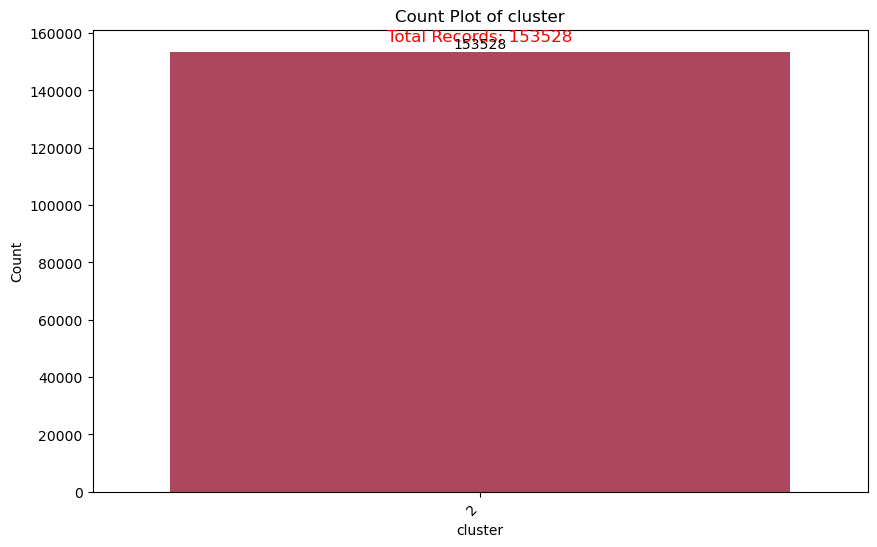

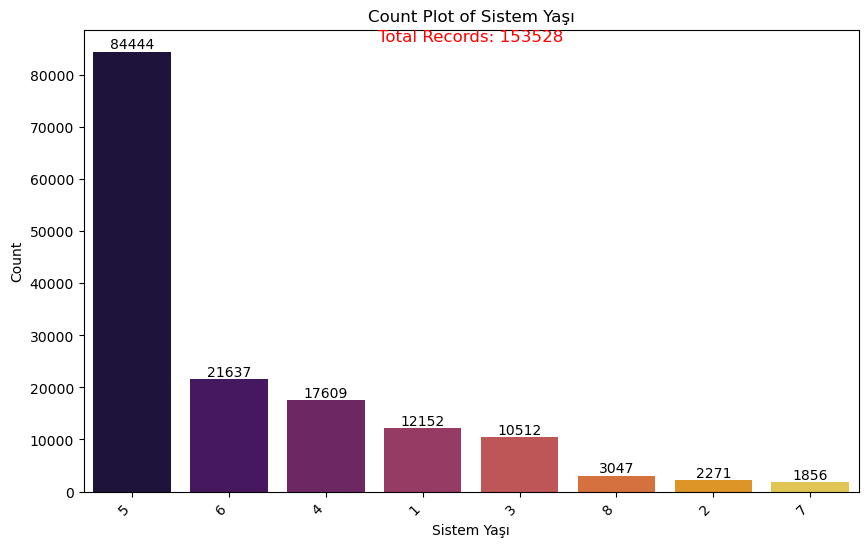

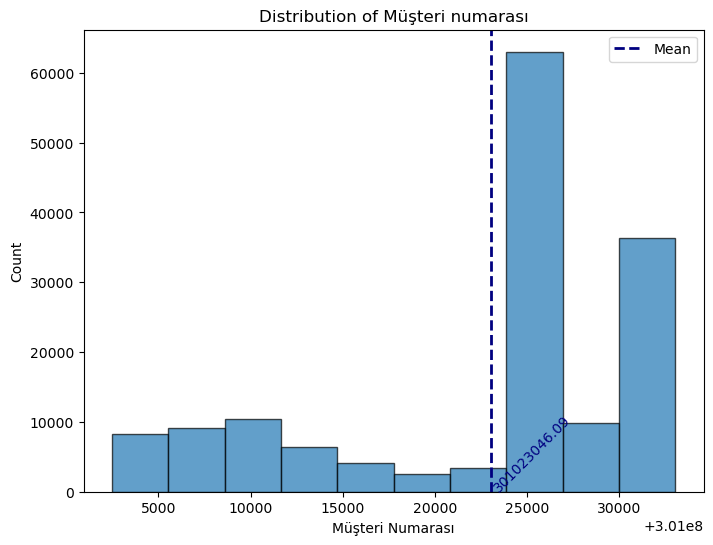

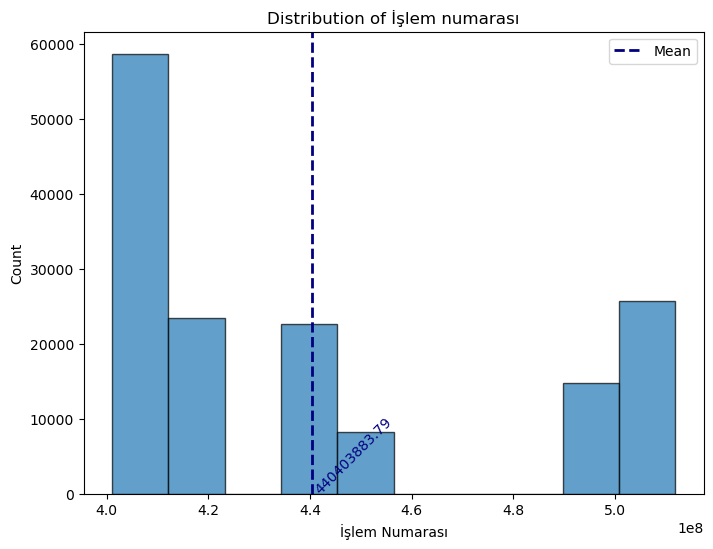

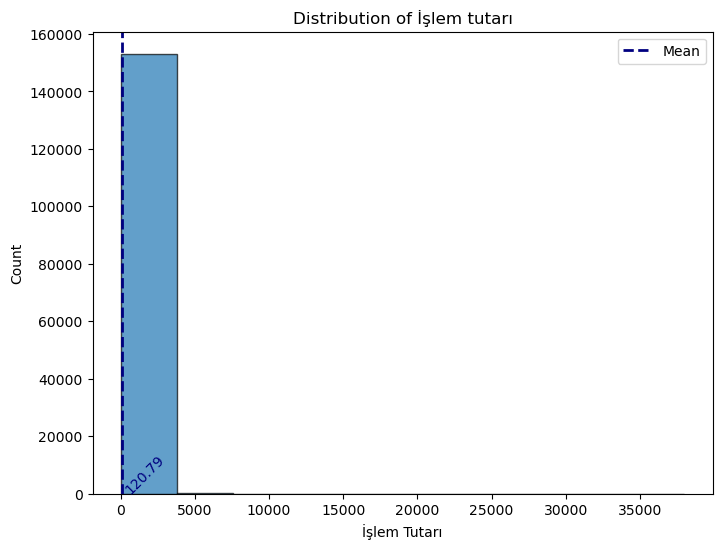

In [16]:
cluster_analysis(df,2)

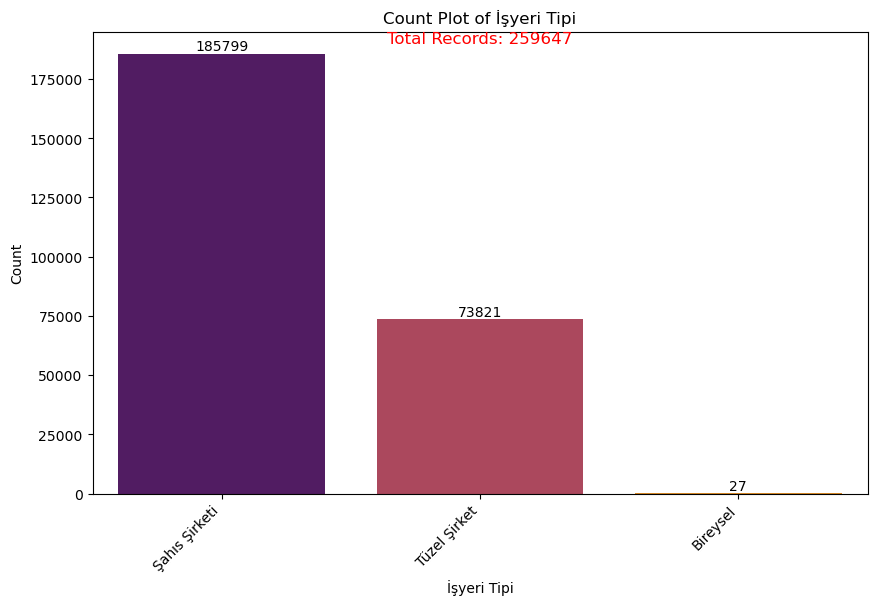

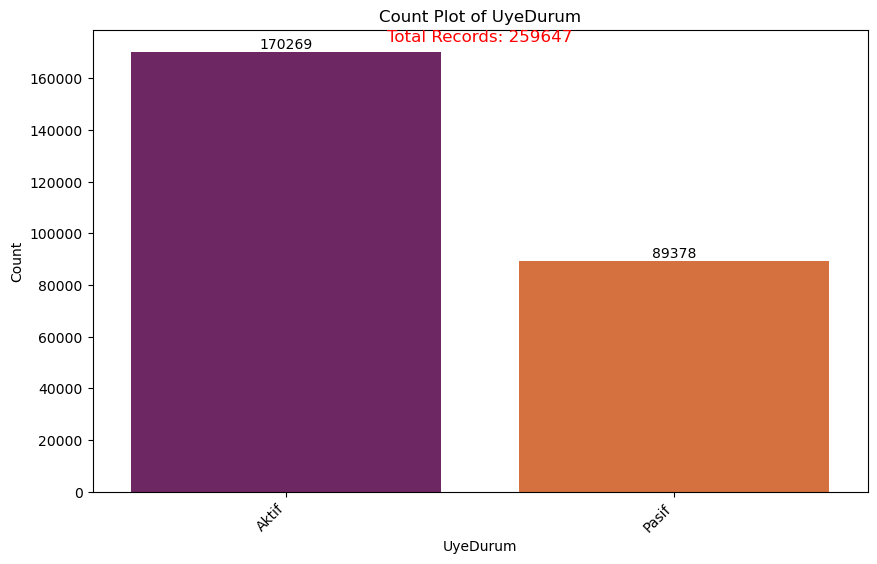

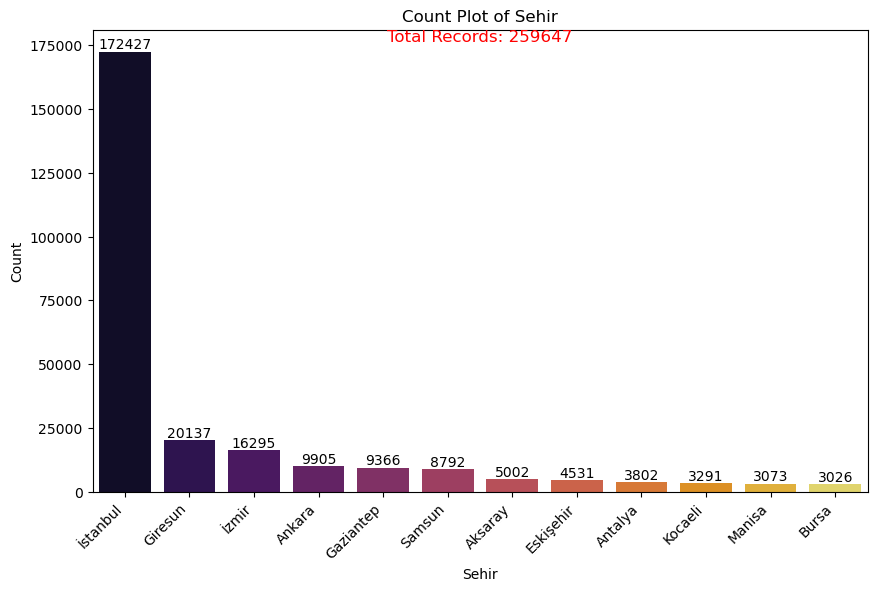

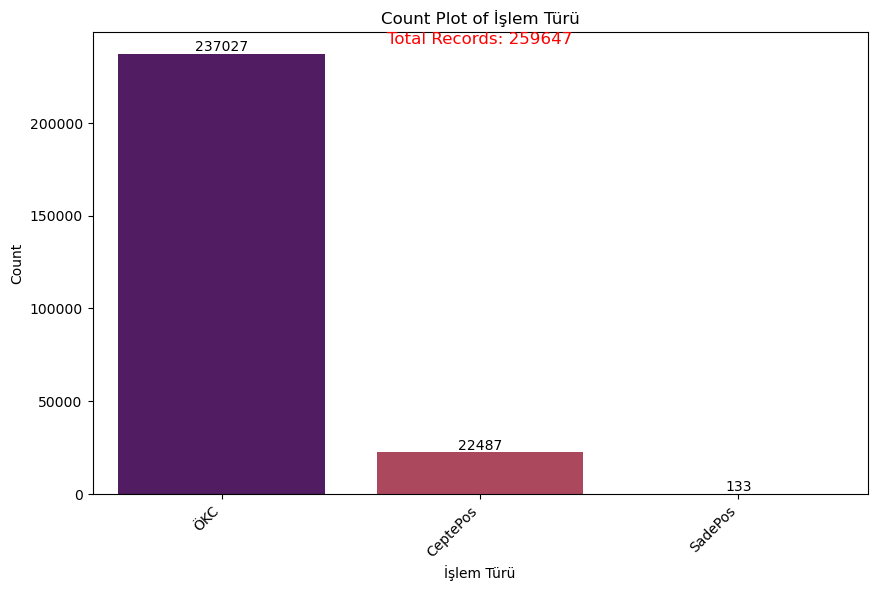

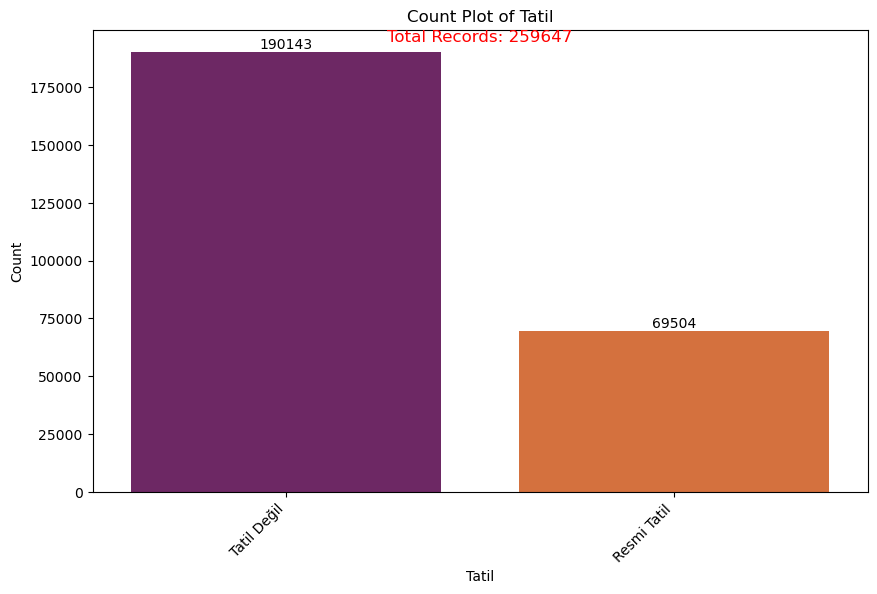

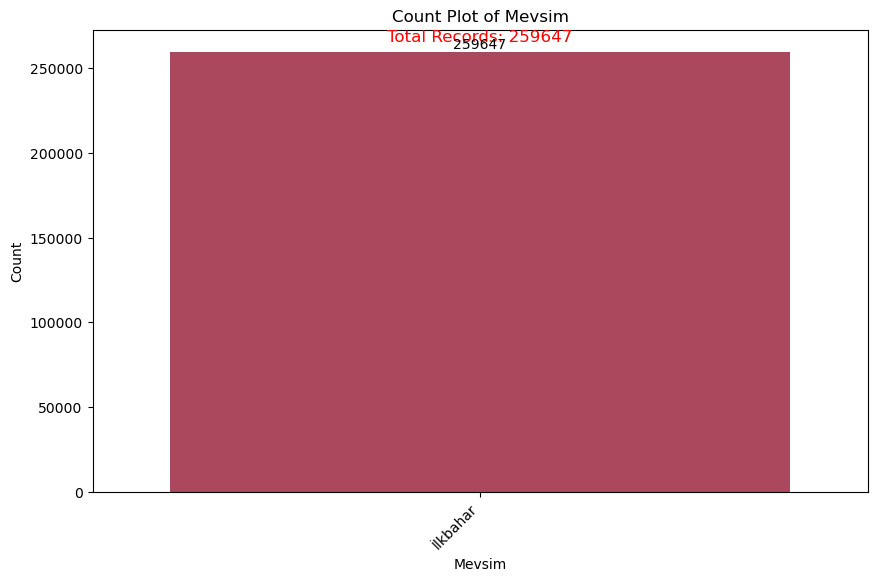

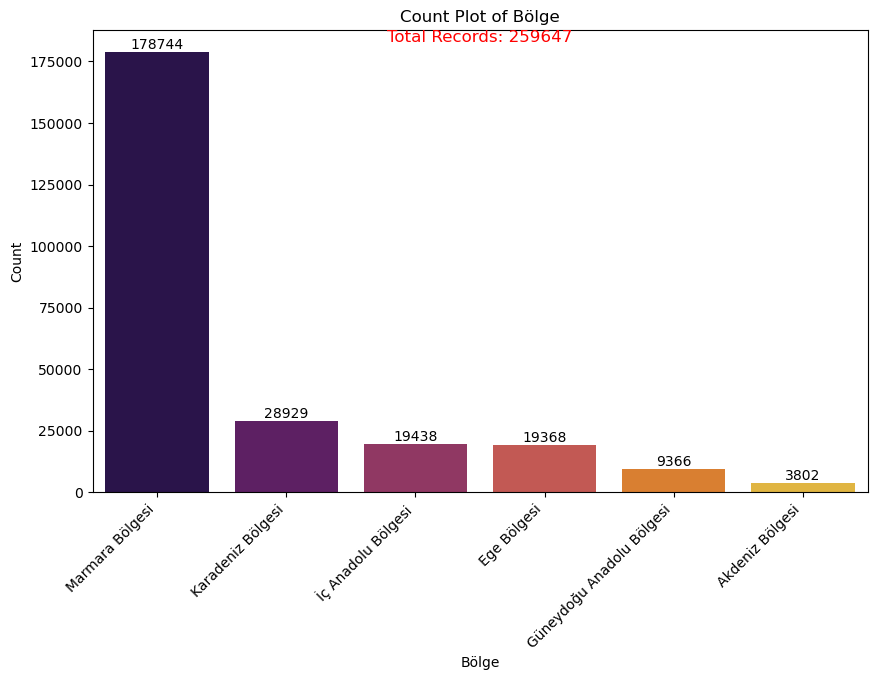

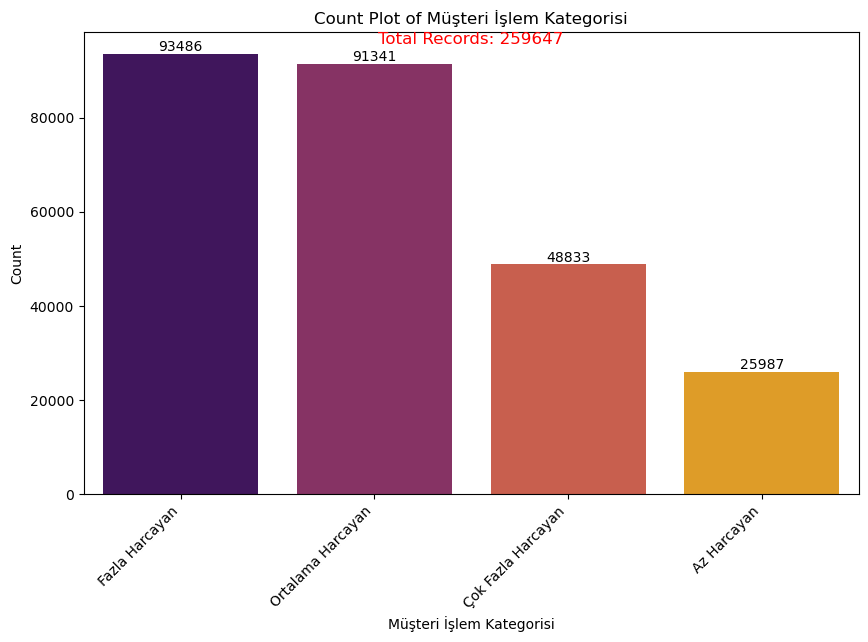

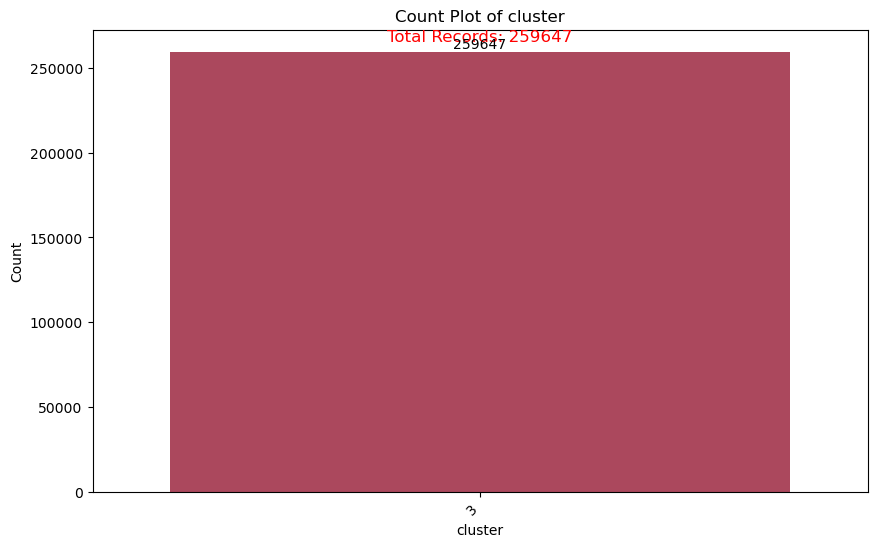

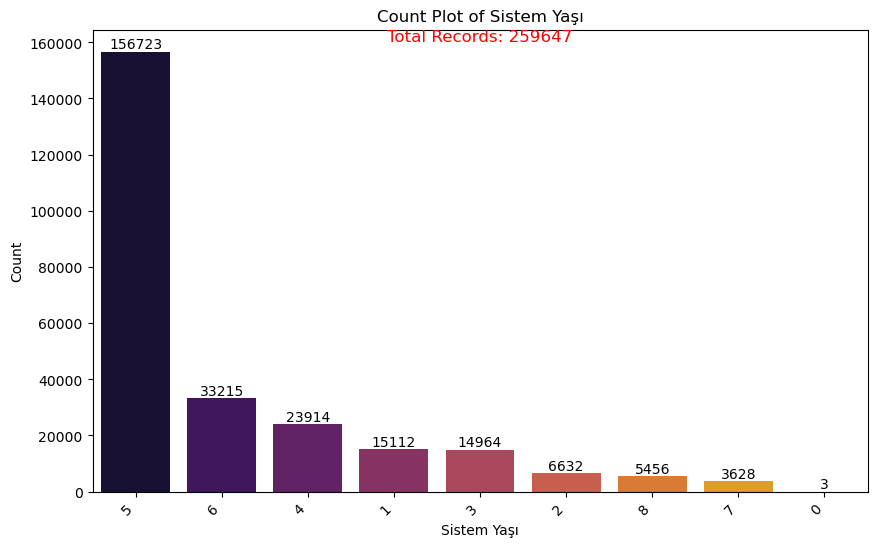

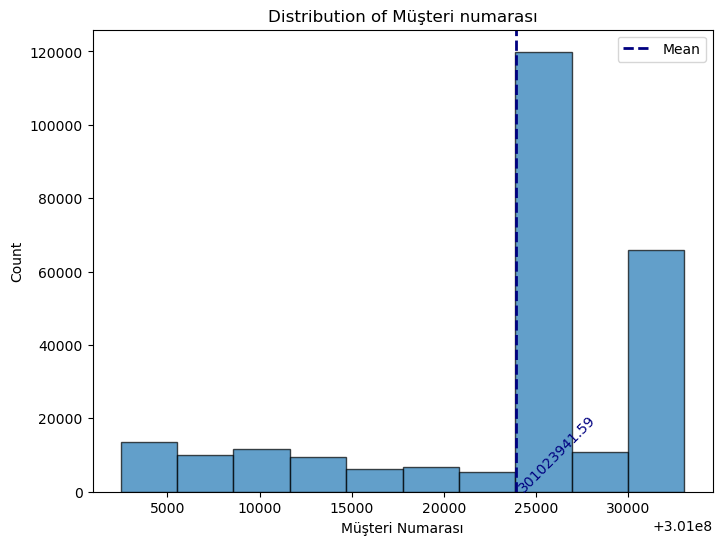

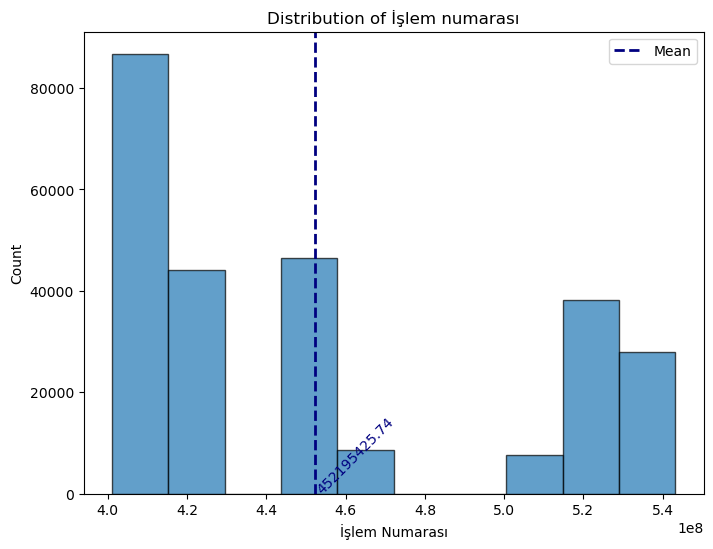

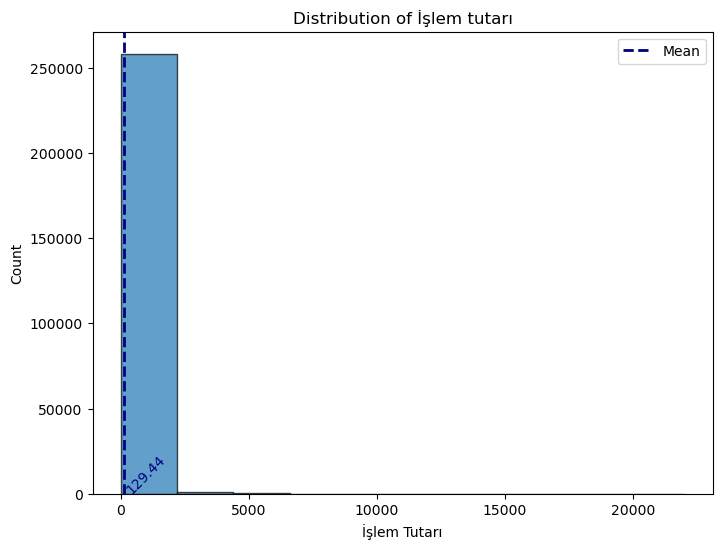

In [17]:
cluster_analysis(df,3)

Cluster 0:
- Kategori: Şahıs Şirketi çoğunlukla
- Ödeme Yöntemi: ÖKC ile ödeme alımı çoğunlukta
- Harcama Mevsimi: sadece yaz aylarında yapılan harcamalar bu clusterda toplanmış
- Tatil: tatil olmayan günler çoğunlukta
- Bölge: Marmara bölgesi çoğunlukta
- Harcama Seviyesi: fazla harcayan kategorisi baskın olmakla birlikte ortalama harcayan kategorisini de içeriyor
- Ortalama İşlem Tutarı: 166.5

Cluster 1:
- Kategori: Şahıs Şirketi çoğunlukla
- Ödeme Yöntemi: ÖKC ile ödeme alımı çoğunlukta
- Harcama Mevsimi: sonbaharda yapılan işlemler çoğunlukta ve bu durumu kış mevsimi takip ediyor.
- Tatil: tatil olmayan günler çoğunlukta
- Bölge: Marmara bölgesi çoğunlukta
- Harcama Seviyesi: Ortalama harcayan kategorisi 1. sırada ve çok küçük bir farkla fazla harcayan kategorisi 2. sırada
- Ortalama İşlem Tutarı: 150.37

Cluster 2:
- Kategori: Şahıs Şirketi çoğunlukla
- Ödeme Yöntemi: ÖKC ile ödeme alımı çoğunlukta
- Harcama Mevsimi: Sadece kış aylarında yapılan işlemler bu clusterda toplanmış
- Tatil: tatil olmayan günler çoğunlukta
- Bölge: Marmara bölgesi çoğunlukta
- Harcama Seviyesi: Ortalama harcayan kategorisi 1. sırada ve çok küçük bir farkla fazla harcayan kategorisi 2. sırada
- Ortalama İşlem Tutarı: 120.8

Cluster 3:
- Kategori: Şahıs Şirketi çoğunlukla
- Ödeme Yöntemi: ÖKC ile ödeme alımı çoğunlukta
- Harcama Mevsimi: Sadece ilkbahar aylarında yapılan işlemler bu clusterda toplanmış
- Tatil: tatil olmayan günler çoğunlukta
- Bölge: Marmara bölgesi çoğunlukta
- Harcama Seviyesi: Fazla harcayan kategorisi 1. sırada ve çok küçük bir farkla ortalama harcayan kategorisi 2. sırada
- Ortalama İşlem Tutarı: 129.44

Cluster İsimlendirmeleri:
- Cluster 0: Yaz Mevsimi Fazla Harcayanlar
- Cluster 1: Sonbahar ve Kış Harcayanları
- Cluster 2: Kış Mevsimi Harcayanlar
- Cluster 3: İlkbahar Fazla Harcayanlar



In [18]:
"""
Cluster İsimlendirmeleri:
- Cluster 0: Yaz Mevsimi Fazla Harcayanlar.
- Cluster 1: Sonbahar ve Kış Harcayanları.
- Cluster 2: Kış Mevsimi Harcayanlar.
- Cluster 3: İlkbahar Fazla Harcayanlar.
"""

# Cluster adlarına denk gelen isimleri değiştirelim.

df['cluster'] = df['cluster'].replace({0:'Yaz Mevsimi Fazla Harcayanlar',
                                        1:'Sonbahar ve Kış Harcayanlar',
                                        2:'Kış Mevsimi Harcayanlar',
                                        3:'İlkbahar Fazla Harcayanlar'})

In [117]:
df.head()

,Müşteri Numarası,Firma Adı,İşyeri Tipi,UyeDurum,İşyeri Adresi,Sehir,İşyeri Aktivasyon Tarihi,İşlem Numarası,İşlem Tarihi,İşlem Tutarı,İşlem Türü,cluster,Tatil,Mevsim,Bölge,Müşteri İşlem Kategorisi,Sistem Yaşı
0,301002470,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,401003136,2015-09-18 14:35:04,5.00,CeptePos,Sonbahar ve Kış Harcayanlar,Tatil Değil,Sonbahar,Karadeniz Bölgesi,Çok Fazla Harcayan,8
1,301002470,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,403526702,2019-04-13 13:31:00,32.70,ÖKC,İlkbahar Fazla Harcayanlar,Resmi Tatil,İlkbahar,Karadeniz Bölgesi,Çok Fazla Harcayan,8
2,301002470,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,403529006,2019-04-13 19:30:00,998.05,ÖKC,İlkbahar Fazla Harcayanlar,Resmi Tatil,İlkbahar,Karadeniz Bölgesi,Çok Fazla Harcayan,8
3,301002470,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,403530803,2019-04-14 13:52:00,105.75,ÖKC,İlkbahar Fazla Harcayanlar,Resmi Tatil,İlkbahar,Karadeniz Bölgesi,Çok Fazla Harcayan,8
4,301002470,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,403531107,2019-04-14 15:09:00,163.00,ÖKC,İlkbahar Fazla Harcayanlar,Resmi Tatil,İlkbahar,Karadeniz Bölgesi,Çok Fazla Harcayan,8


In [118]:
df.drop("cluster",axis=1).to_csv('hackathon_data_final.csv',index=False)